In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import  models
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:

def load_images(folder, label):
    images = []
    img_size = (256,256)  
    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.endswith(".jpg"):  
                img = cv2.imread(os.path.join(root, filename))
                img = cv2.resize(img, img_size)
                images.append((img, label))
                   
    
    return images


In [3]:
def load_images2(folder, label):
    images = []
    img_size = (256,256)  # Specify your desired image size

    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.endswith(".jpg"):  # Check if the file has a .jpg extension
                img = cv2.imread(os.path.join(root, filename))
                img = cv2.resize(img, img_size)
                images.append((img, label))
                    
    return images


In [4]:
cracked_folder = "/Users/snehagupta/Downloads/test/pos"
uncracked_folder="/Users/snehagupta/Downloads/test/neg"

In [5]:
cracked_images = load_images(cracked_folder, 1) 
uncracked_images = load_images2(uncracked_folder, 0)

In [6]:
images = cracked_images + uncracked_images

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(
    [image[0] for image in images], [image[1] for image in images],
    test_size=0.2, random_state=32, shuffle=True)


In [8]:
train_images = np.array(train_images)/255
test_images = np.array(test_images)/255
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

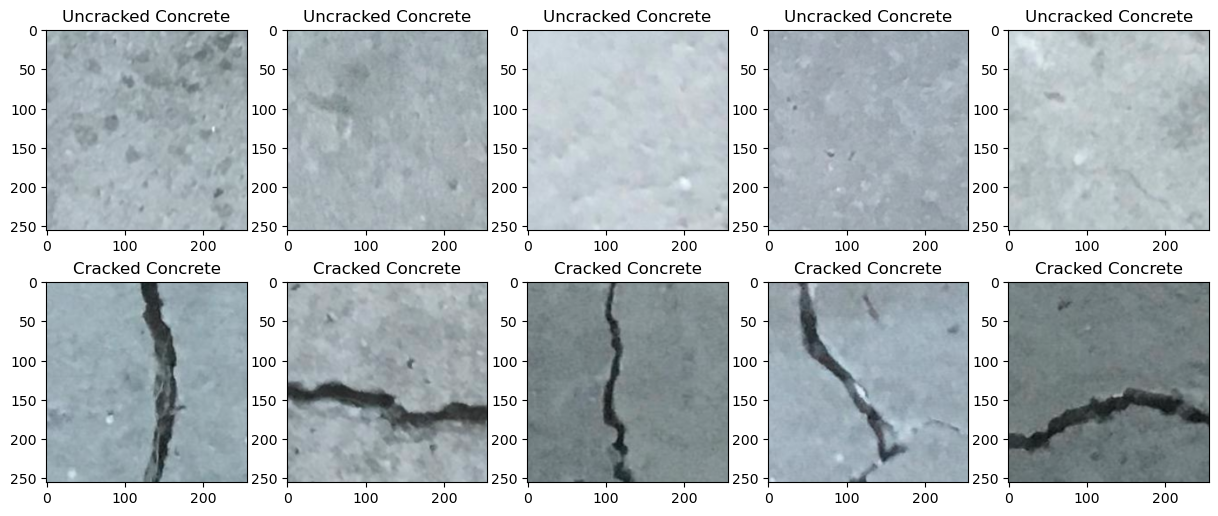

In [9]:
#to display the images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for i in range(5):
    axs[i].imshow(train_images[train_labels==0][i]) #Label for 0
    axs[i].set_title('Uncracked Concrete')
    axs[i+5].imshow(train_images[train_labels==1][i]) #label for 1
    axs[i+5].set_title('Cracked Concrete')
plt.show()

In [10]:
model = Sequential()

#First layer is a convolutional layer 
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256, 3))) 
model.add(MaxPooling2D(pool_size = (2, 2))) #MaxPool
model.add(Dropout(.3)) #30% dropout
model.add(Conv2D(32, (3, 3), activation = "relu")) #Second layer is a convolutional 
model.add(MaxPooling2D(pool_size = (2, 2))) #MaxPool
model.add(Dropout(.3)) #Dropout
model.add(Conv2D(32, (3, 3), activation = "relu")) #THird layer is a convolutional 
model.add(MaxPooling2D(pool_size = (2, 2))) #MaxPool
model.add(Dropout(.3)) #Dropout


model.add(Flatten()) #Flatten as vector
model.add(Dense(258, activation = "relu")) #Fully connected layer with relu

model.add(Dense(1, activation = "sigmoid"))

In [11]:

print("Compiling ")
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(" compiled")



Compiling 
 compiled


In [12]:
print("Fitting ")
model.fit(train_images, train_labels, batch_size = 64, epochs = 10)
print("successfully fitted")


Fitting 
Epoch 1/10
25/25 [==============================] - 15s 569ms/step - loss: 1.8808 - accuracy: 0.4950
Epoch 2/10
25/25 [==============================] - 14s 572ms/step - loss: 0.6928 - accuracy: 0.5150
Epoch 3/10
25/25 [==============================] - 14s 569ms/step - loss: 0.6922 - accuracy: 0.5275
Epoch 4/10
25/25 [==============================] - 15s 594ms/step - loss: 0.6890 - accuracy: 0.5056
Epoch 5/10
25/25 [==============================] - 17s 669ms/step - loss: 0.6869 - accuracy: 0.5606
Epoch 6/10
25/25 [==============================] - 17s 691ms/step - loss: 0.6487 - accuracy: 0.6281
Epoch 7/10
25/25 [==============================] - 18s 703ms/step - loss: 0.5678 - accuracy: 0.7175
Epoch 8/10
25/25 [==============================] - 18s 706ms/step - loss: 0.4608 - accuracy: 0.8019
Epoch 9/10
25/25 [==============================] - 16s 635ms/step - loss: 0.3717 - accuracy: 0.8425
Epoch 10/10
25/25 [==============================] - 17s 669ms/step - loss: 0.1853

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)



13/13 [==============================] - 1s 77ms/step - loss: 0.1751 - accuracy: 0.9651
Test accuracy: 0.9650872945785522


In [14]:
y_scores = model.predict(test_images)
print(y_scores)

13/13 [==============================] - 1s 72ms/step
[[0.25405696]
 [0.999984  ]
 [0.92986816]
 [0.40799683]
 [0.45551342]
 [0.27089837]
 [0.99990594]
 [0.31982282]
 [0.4295827 ]
 [0.18270287]
 [0.21572039]
 [0.98990947]
 [0.12131633]
 [0.2399786 ]
 [0.9999565 ]
 [0.9998482 ]
 [0.22495152]
 [0.18069442]
 [0.20578209]
 [0.19017854]
 [0.18151319]
 [0.9635697 ]
 [0.9999947 ]
 [0.1554464 ]
 [0.09814426]
 [0.8458999 ]
 [0.15334792]
 [0.22080137]
 [0.8219085 ]
 [0.9982401 ]
 [0.9177834 ]
 [0.17865218]
 [0.29021978]
 [0.09899187]
 [0.29407227]
 [0.1548894 ]
 [0.19383775]
 [0.9682849 ]
 [0.11314132]
 [0.9528106 ]
 [0.44582817]
 [0.9999252 ]
 [0.14891762]
 [0.08070074]
 [0.17937662]
 [0.23196869]
 [0.2410956 ]
 [0.15548557]
 [0.9902795 ]
 [0.92779225]
 [0.20470825]
 [0.2698087 ]
 [0.30584165]
 [0.99989086]
 [0.14031962]
 [0.84986395]
 [0.9988713 ]
 [0.22605117]
 [0.98366046]
 [0.99936974]
 [0.15173733]
 [0.99997675]
 [0.9953895 ]
 [0.994312  ]
 [0.1911522 ]
 [0.254603  ]
 [0.4437786 ]
 [0.9986

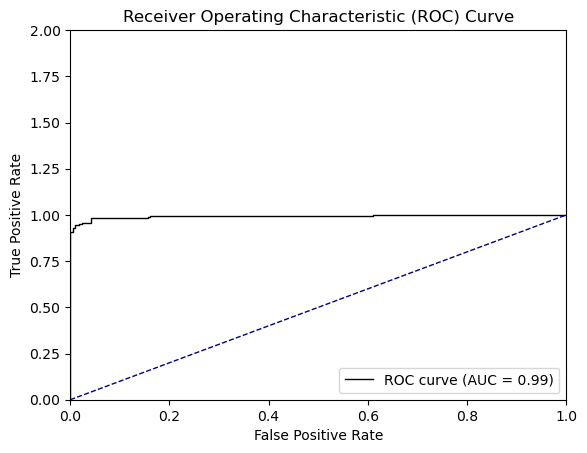

In [15]:
fpr, tpr, thresholds = roc_curve(test_labels, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='black', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 2.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [16]:
train_pred = model.predict(train_images)


50/50 [==============================] - 4s 75ms/step


In [17]:
test_pred = model.predict(test_images)

13/13 [==============================] - 1s 70ms/step


In [18]:
train_cm = confusion_matrix(train_labels, train_pred.round())

test_cm = confusion_matrix(test_labels, test_pred.round())

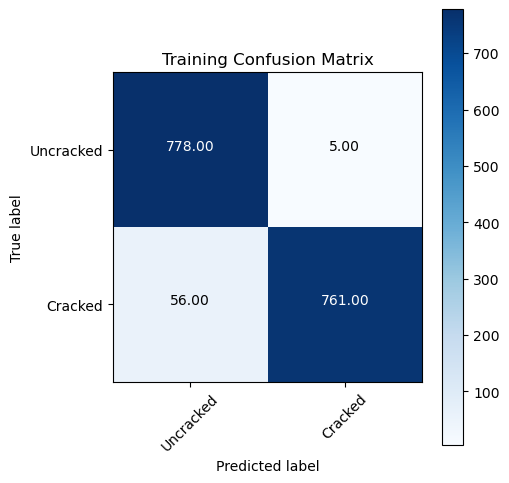

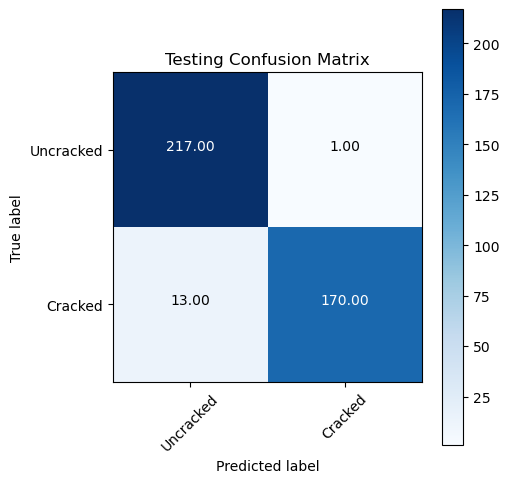

In [19]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(5,5))
plot_confusion_matrix(train_cm, classes=['Uncracked', 'Cracked'], title='Training Confusion Matrix')
plt.show()


plt.figure(figsize=(5,5))
plot_confusion_matrix(test_cm, classes=['Uncracked', 'Cracked'], title='Testing Confusion Matrix')
plt.show()


In [20]:
#checking the probability of crack and non crack images
test_folder = '/Users/snehagupta/Downloads/yes'
test_images = []
for i in os.listdir(test_folder):
            if i.endswith(".jpg"):  
                img = cv2.imread(os.path.join(test_folder, i))
                img = cv2.resize(img,(256,256))
                test_images.append((img))

In [21]:
test_images = np.array(test_images) / 255.0

In [22]:
predictions = model.predict(test_images)

3/3 [==============================] - 0s 48ms/step


In [23]:
for i, pred in enumerate(predictions):
    print(f"Image {i+1}: {pred[0]}")

Image 1: 0.9993094205856323
Image 2: 0.988064169883728
Image 3: 0.6569252610206604
Image 4: 0.927334725856781
Image 5: 0.8895165324211121
Image 6: 0.9959319829940796
Image 7: 0.9989924430847168
Image 8: 0.9943838119506836
Image 9: 0.9973480105400085
Image 10: 0.9846798181533813
Image 11: 0.9855619668960571
Image 12: 0.9901152849197388
Image 13: 0.9885116815567017
Image 14: 0.9587280750274658
Image 15: 0.9754546284675598
Image 16: 0.9997038841247559
Image 17: 0.23102465271949768
Image 18: 0.4579249918460846
Image 19: 0.9964095950126648
Image 20: 0.9529008865356445
Image 21: 0.18264299631118774
Image 22: 0.2625851333141327
Image 23: 0.26340681314468384
Image 24: 0.2247803658246994
Image 25: 0.21420037746429443
Image 26: 0.24224728345870972
Image 27: 0.16148480772972107
Image 28: 0.08499924838542938
Image 29: 0.11511437594890594
Image 30: 0.10109752416610718
Image 31: 0.13614521920681
Image 32: 0.4086301326751709
Image 33: 0.2568257451057434
Image 34: 0.16371747851371765
Image 35: 0.11284

1/1 [==============================] - 0s 14ms/step


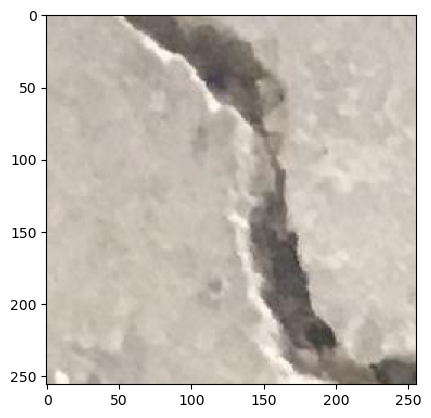

No crack
1/1 [==============================] - 0s 16ms/step


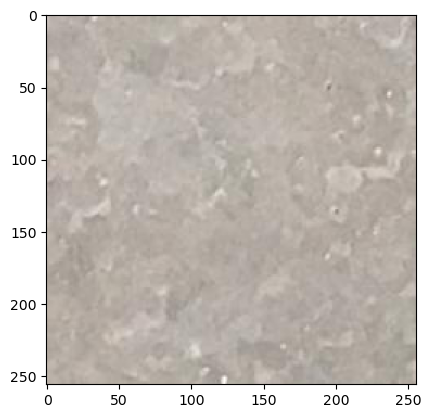

No crack
1/1 [==============================] - 0s 18ms/step


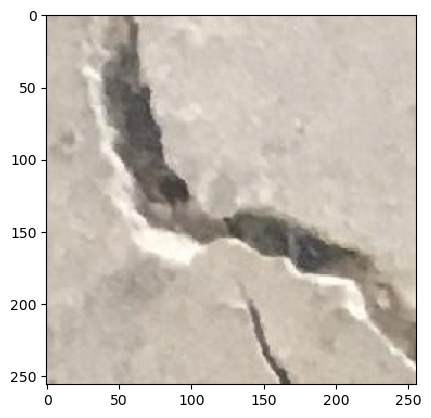

Crack
1/1 [==============================] - 0s 15ms/step


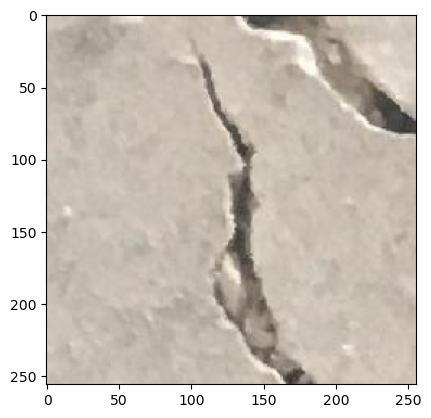

No crack
1/1 [==============================] - 0s 13ms/step


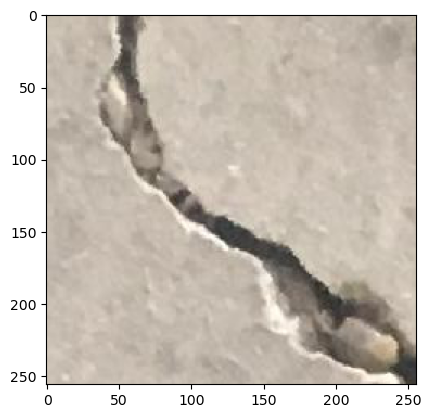

Crack
1/1 [==============================] - 0s 15ms/step


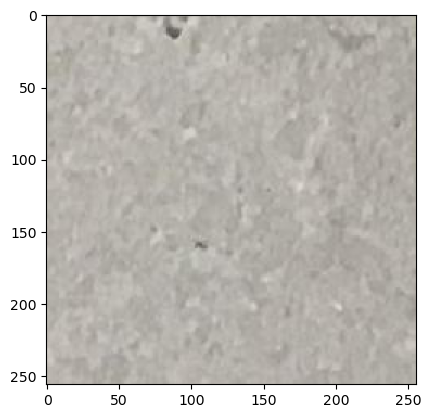

No crack
1/1 [==============================] - 0s 17ms/step


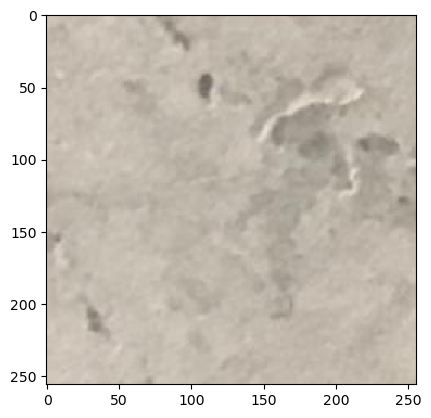

No crack
1/1 [==============================] - 0s 13ms/step


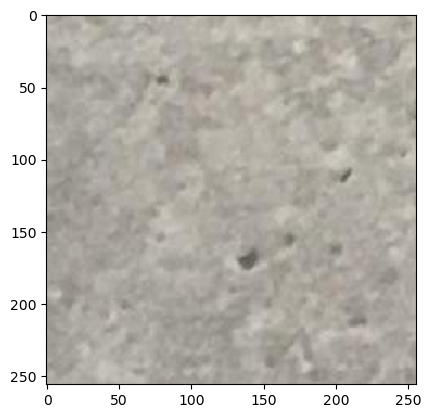

No crack


In [24]:


input_dir = "/Users/snehagupta/Downloads/H"


for i in os.listdir(input_dir):
    img = image.load_img(input_dir + '/' + i, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  
    val = model.predict(x)
    plt.imshow(img)
    plt.show()
    if val[0] < 0.5:
        print("No crack")
    else:
        print("Crack") 
